# Activity 8

In [1]:
try:
    import ipywidgets
except ImportError:
    try:
        !{sys.executable} -m pip -q install ipywidgets
        import ipywidgets
    except ImportError:
        !{sys.executable} -m pip -q --user install ipywidgets
    finally:
        !jupyter nbextension enable --py widgetsnbextension
        print("You will need to refresh your browser page")

In [2]:
import matplotlib
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import numpy as np

In [4]:
%matplotlib inline

## Exercise 08.1

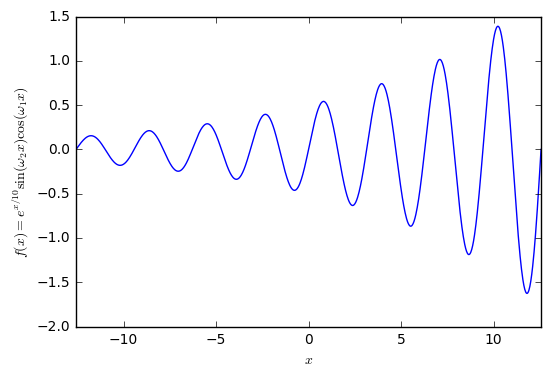

In [5]:
from ipywidgets import interact
import math
def plot (ω_1=1, ω_2=1):
    num_points=1000
    x = np.linspace(-4*np.pi, 4*np.pi, num=num_points)
    f = np.exp(x/10)*np.sin(ω_2*x)*np.cos(ω_1*x)
    plt.plot(x, f)
    plt.xlabel('$x$')
    plt.ylabel('$f(x) = e^{x/10} \sin(\omega_{2}x)\cos(\omega_{1}x)$')
    plt.xlim(x[0], x[-1]);
plot ()

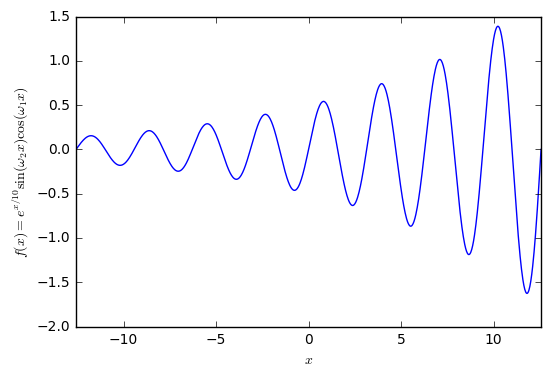

In [6]:
interact(plot, ω_1=(0, 2, 0.01), ω_2=(0, 2, 0.01));

## Exercise 08.2

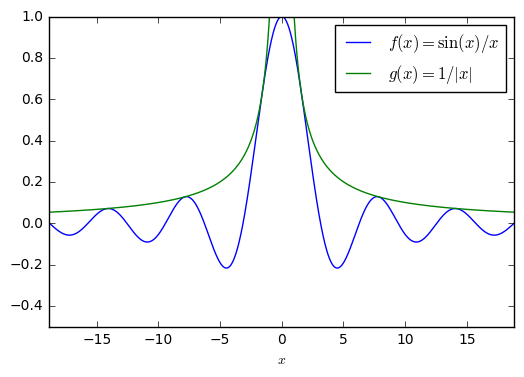

In [7]:
num_points = 1000
x = np.linspace(-6*np.pi, 6*np.pi, num_points)
f = np.sin(x) / x
g = 1/np.abs(x)
plt.plot (x, f, label='$f(x) = \sin(x)/x$')
plt.plot (x, g, label='$g(x) = 1/| x |$')
plt.xlabel ('$x$')
plt.legend ()
plt.xlim (x[0],x[-1])
plt.ylim (-0.5,1);

## Exercise 08.3

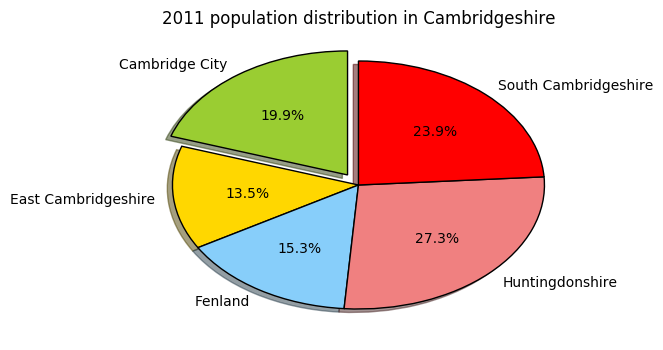

In [8]:
district = ('Cambridge City', 'East Cambridgeshire', 'Fenland', 'Huntingdonshire', 'South Cambridgeshire')
population = (123900, 83800, 95300, 169500, 148800)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']
explode = (0.1, 0.0, 0, 0, 0) 
def pop (year = 2011, Cambridge_City = 0, East_Cambridgeshire = 0, Fenland = 0, Huntingdonshire = 0, South_Cambridgeshire=0):
    n = year - 2011
    population_new= [0]*5
    population_new[0] = population[0]*(1+Cambridge_City)**(n/100)
    population_new[1] = population[1]*(1+East_Cambridgeshire)**(n/100)
    population_new[2] = population[2]*(1+Fenland)**(n/100)
    population_new[3] = population[3]*(1+Huntingdonshire)**(n/100)
    population_new[4] = population[4]*(1+South_Cambridgeshire)**(n/100)
    plt.pie(population_new, explode=explode, labels=district, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title("{} population distribution in Cambridgeshire".format(year));
interact(pop, year=(2011,2021,1), Cambridge_City=(0, 10, 1), East_Cambridgeshire=(0, 10, 1), Fenland=(0, 100, 1), Huntingdonshire=(0, 100, 1), South_Cambridgeshire=(0, 100, 1));

## Exercise 08.4

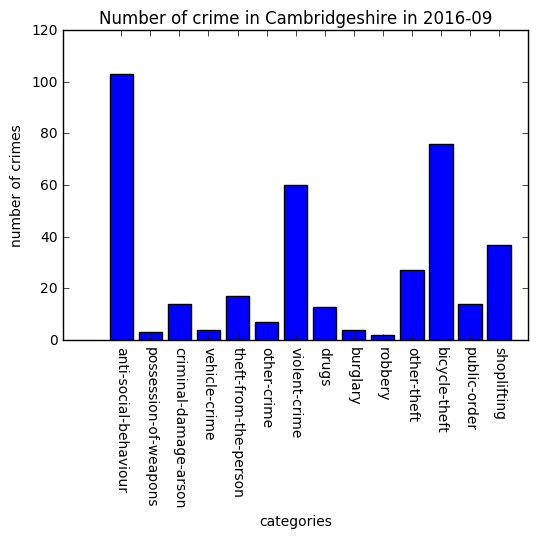

In [9]:
import json
import requests
# A triangle that includes most of the Cambridge city centre
# (long, lat) for three vertices of a triangle (no spaces!)
p0 = '52.211546,0.116465'
p1 = '52.203510,0.145500'
p2 = '52.189730,0.113050'

# year-month of interest
year_month = '2016-09'

# Construct request URL string using the above data
url = 'https://data.police.uk/api/crimes-street/all-crime?poly=' + p0 + ':' + p1 + ':' + p2 + '&date=' + year_month

# Fetch data from https://data.police.uk
r = requests.get(url)

crime_data = r.json()

categories = ('anti-social-behaviour', 'bicycle-theft', 'burglary', 'criminal-damage-arson', 'drugs', 'other-crime', 'other-theft', 'public-order', 'shoplifting', 'theft-from-the-person', 'vehicle-crime', 'violent-crime')
categories_freq = {}
# Iterate over all reports
for report in crime_data:
    # Get category type from the report
    category = report['category']
    
    if category in categories_freq:
        categories_freq[category] += 1
    else:
        categories_freq[category] = 1
        
categories = []
num_crime = []
for cat, num in categories_freq.items():
    categories += [cat]
    num_crime += [num]
# Create an array with the position of each bar along the x-axis, e.g [0, 1, 2, 3, 4] 
x_pos = np.arange(len(categories))

# Produce bar plot
plt.bar(x_pos, num_crime, align='center');

# Replace the x ticks with the Tripos name, and rotate labels 30 degrees
plt.xticks(x_pos, categories, rotation=-90)

# Add axis labels 
plt.title('Number of crime in Cambridgeshire in {}'.format(year_month))
plt.xlabel('categories')
plt.ylabel('number of crimes');